# Blending Images (Average)

Using OpenCV we can blend i.e. compute a weighted **average** of the pixel values for a set of color images which have the *same dimensions*.

## Weather Forecast
I have about 60 images which I obtained from this [weather forecast website](http://coolwx.com/ptype/) by converting GIF to JPG images. I’m interested in seeing the areas which will receive the most rainfall on average over the next 10 days (i.e greens). In order to do that I need to create a single image which blends the weather forecast frames for the next 10 days.

### Import libraries & Image files

In [1]:
import glob
import numpy as np
import cv2
from PIL import Image

images = glob.glob('images/weather-data/*.jpg')

### A quick GIF of all the images is shown below


![SegmentLocal](images/weather.gif "segment")

* We will use these images to create a blended or average image, which will show us the places where it is more likely to snow.


### Now we store all the images in an array

In [2]:
image_data = []

for image in images:
    this_image = cv2.imread(image ,1)
    image_data.append(this_image)

### Computing the average

In [3]:
avg = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        alpha = 1.0/(i + 1)
        beta = 1.0 - alpha
        avg = cv2.addWeighted(image_data[i], alpha, avg, beta, 0.0)

We multiply each image by a `Weight`. Weight depends on the number of images, so here weight is `1/60` (since there are 60 images).
Then the Average is computed using `cv2.addWeighted()` method.

### Saving

Finally we save the image and view the result.

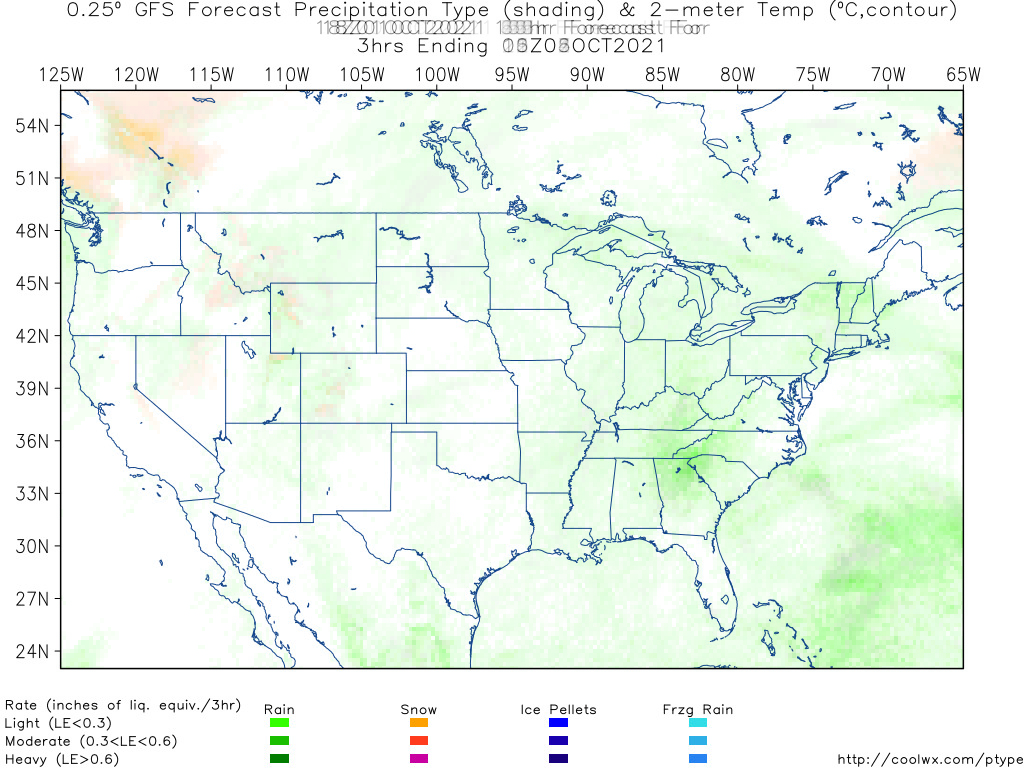

In [4]:
cv2.imwrite('images/weather-forecast-blended.jpg', avg)
Image.fromarray(avg)